In [44]:
from io import StringIO
import subprocess
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
timeouts = set(np.linspace(0,200,25)).union(set(np.linspace(0,20,25)))
csv_content = subprocess.run(f'../build/dpm-simulator.exe {' '.join([f'-t {v}' for v in timeouts])} -v csv -wl ../workloads/w1.txt -wl ../workloads/w2.txt -psm ../example/psm.txt', capture_output=True, text=True).stdout

In [51]:
df = pd.read_csv(StringIO(csv_content))
df['energy_with_dpm_percent'] = (df['energy_without_dpm'] - df['energy_with_dpm'])/df['energy_without_dpm']
df = df.sort_values(by='timeout')
df.head()

,file,timeout,energy_without_dpm,energy_with_dpm,energy_with_dpm_percent
0,../workloads/w1.txt,0.000000,29.879098,0.260785,0.991272
47,../workloads/w2.txt,0.000000,30.138814,0.368555,0.987771
1,../workloads/w1.txt,0.833333,29.879098,0.257605,0.991378
48,../workloads/w2.txt,0.833333,30.138814,0.370734,0.987699
4,../workloads/w1.txt,1.666667,29.879098,0.256584,0.991413


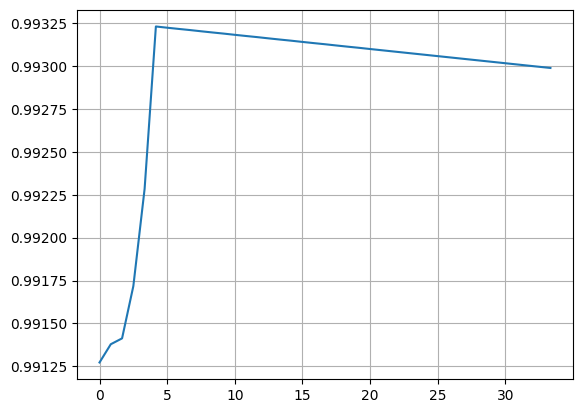

In [56]:
df1 = df[df['file'] == '../workloads/w1.txt']
df1 = df1[df1['timeout'] < 40]

plt.grid()
plt.plot(df1['timeout'], df1['energy_with_dpm_percent'])

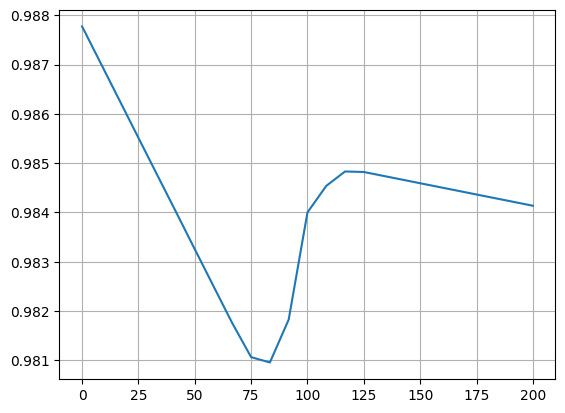

In [57]:
df2 = df[df['file'] == '../workloads/w2.txt']

plt.grid()
plt.plot(df2['timeout'], df2['energy_with_dpm_percent'])